# Red neuronal

Las redes neuronales artificiales son sistemas de procesamiento de información que intentan simular las redes de neuronas biológicas. en donde la únidad mínima de la red es llamado nodo, los cuales están conectados entre sí.

Las primeras redes neuronales se empiezan a estudiar en los años 40', con el estudio de la unidades mínima que luego se llamaría perceptrón. Esta investigaciones sufrieron una abandono por algunas décadas, hasta que en mediado de 1980 se implementa el backpropagation, lo cual potencia al mundo de la inteligencia artificial y da camino al estudio de las redes neuronales

## Perceptrón 

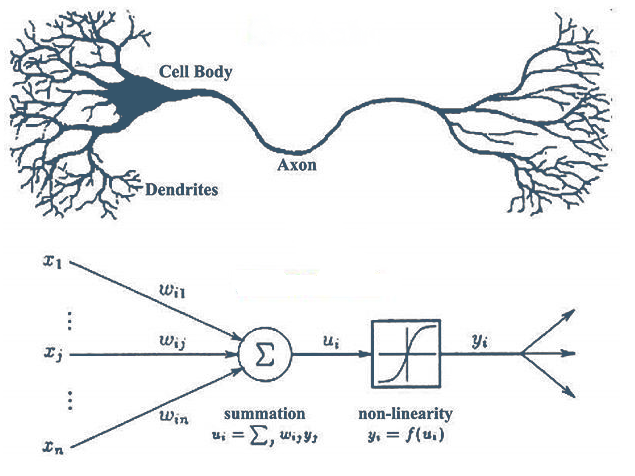

El perceptrón es un discriminador lineal en donde las entradas son ponderadas con pesos, que en un primer momento son elegidos de forma aleatoria. Luego, se unen en sumatoria y son input a la función de activación (puede ser sigmoid,relu, etc), con lo cual se obtiene una salida.

## Red neuronal 

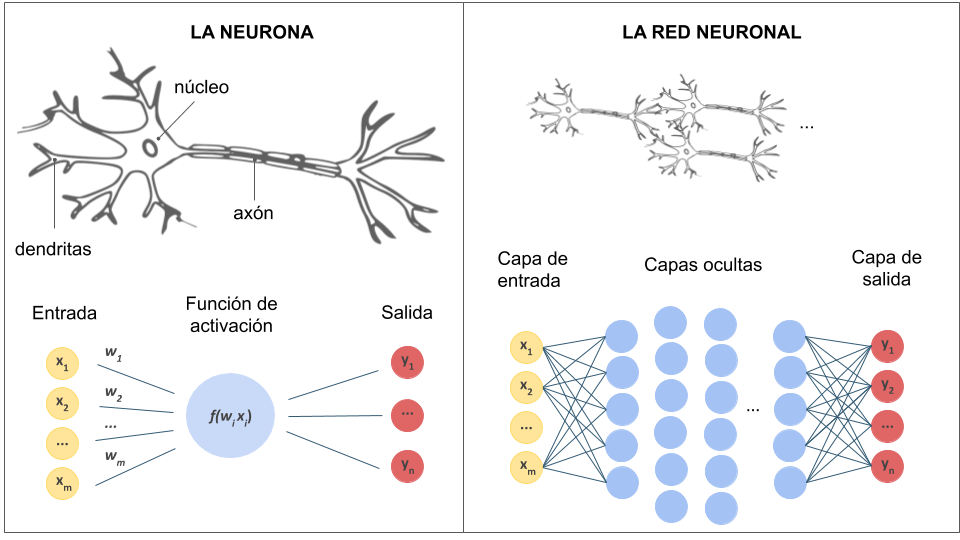

La red neuronal consta de enlazar muchos perceptrones en distintas capas. Consta de dos partes:
* Feedforward: hacer el cálculo de los pesos a las variables input, pasando por la/las diferentes funciones de activación, en sentido capa de entrada --> capa de salida.
* Backpropagation: se cálcula el error del modelo y se actualiza los pesos ($w_{i}$) mediante alguna técnica de optimización (gd,sgd,adam,etc) , para volver a aplicar la etapa de feedforward.

**Links importantes**

* https://www.tesisenred.net/bitstream/handle/10803/9441/tjjmm1de1.pdf?sequence=1&isAllowed=y
* https://www.xeridia.com/blog/redes-neuronales-artificiales-que-son-y-como-se-entrenan-parte-i
* https://magiquo.com/redes-neuronales-o-el-arte-de-imitar-el-cerebro-humano/
* http://bibing.us.es/proyectos/abreproy/11084/fichero/Memoria+por+cap%C3%ADtulos+%252FCap%C3%ADtulo+4.pdf+
* https://bootcampai.medium.com/redes-neuronales-13349dd1a5bb
* https://ml4a.github.io/ml4a/es/neural_networks/
* https://cebebelgica.es/es_ES/blog/10/que-es-una-red-neuronal-artificial.html

## Implementación

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

#### Carga de librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import warnings
import seaborn as sns
import timeit
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
warnings.filterwarnings("ignore")

In [2]:
def plot_confusion_matrix(y_train_pred,y_train,dom,classes):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train,y_train_pred)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.xlabel("Prediction",fontsize=12,fontweight='bold')
    plt.ylabel("Real",fontsize=12,fontweight='bold')
    plt.tight_layout()
    plt.show()

**Ruta**

In [3]:
ruta_input="C:/Users/Omar/Desktop/Omar/Temas data science/Bases/Credit car"

In [4]:
base_input=pd.read_excel(os.path.join(ruta_input,"default of credit card clients.xls"),header=1)

In [5]:
base_input.shape

(30000, 25)

In [6]:
base_input.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
base_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Renombramos dataset**

In [8]:
base_input=base_input.iloc[:,1:]

In [9]:
colum_base=["credito_otorgado($)","genero","educacion","estado_civil","edad","marca_pago_mes_6","marca_pago_mes_5",
            "marca_pago_mes_4","marca_pago_mes_3","marca_pago_mes_2","marca_pago_mes_1","estado_cuenta_mes_6($)",
            "estado_cuenta_mes_5($)","estado_cuenta_mes_4($)","estado_cuenta_mes_3($)","estado_cuenta_mes_2($)",
            "estado_cuenta_mes_1($)","monto_pago_anterior_6($)","monto_pago_anterior_5($)","monto_pago_anterior_4($)",
            "monto_pago_anterior_3($)","monto_pago_anterior_2($)","monto_pago_anterior_1($)","incumplimiento_sgte_mes"]
base_input.columns=colum_base

**featuring engineering**

In [10]:
base_input.loc[base_input['genero']==1,'genero']='masculino'
base_input.loc[base_input['genero']==2,'genero']='femenino'
base_input.loc[(base_input['educacion']>3) | (base_input['educacion']==0),'educacion']='otros'
base_input.loc[base_input['educacion']==1,'educacion']='posgrado'
base_input.loc[base_input['educacion']==2,'educacion']='universidad'
base_input.loc[base_input['educacion']==3,'educacion']='bachillerato'
base_input.loc[(base_input['estado_civil']==3) | (base_input['estado_civil']==0),'estado_civil']='otros'
base_input.loc[base_input['estado_civil']==1,'estado_civil']='casado'
base_input.loc[base_input['estado_civil']==2,'estado_civil']='soltero'

base_dummies=pd.get_dummies(base_input[['genero','educacion','estado_civil']])
base_input=pd.concat([base_input,base_dummies],axis=1)
base_input.drop(columns=["genero","educacion","estado_civil","edad"],inplace=True)

**Estandarización**

In [11]:
base=base_input.copy()
X=base_input.drop(columns=["incumplimiento_sgte_mes"])
Y=base_input[["incumplimiento_sgte_mes"]]
Y['incumplimiento_sgte_mes']=Y['incumplimiento_sgte_mes'].apply(int)

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
X_scaler = pd.DataFrame(X_scaler)
X_scaler.columns = X.columns

**Train y test para el modelo**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, Y, test_size=0.3, random_state=214)
columns = X_train.columns

**Balanceo**

In [13]:
bal = SMOTE(random_state=23)
databal_X,databal_y= bal.fit_resample(X_train, y_train.values.ravel())
columns=X_train.columns.to_list()
databal_X = pd.DataFrame(data=databal_X,columns=columns )
databal_y= pd.DataFrame(data=databal_y,columns=['y'])

print("Tamaño de X_train: ",len(X_train))
print("Tamaño de bal_data_x: ",len(databal_X))
print("cantidad de registros 0:",len(databal_y[databal_y['y']==0]))
print("cantidad de registros 1:",len(databal_y[databal_y['y']==1]))

Tamaño de X_train:  21000
Tamaño de bal_data_x:  32720
cantidad de registros 0: 16360
cantidad de registros 1: 16360


In [14]:
X_trainbal=databal_X.copy()
y_trainbal=databal_y.copy()

### Implementación del modelo

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

### Perceptrón 

In [15]:
perceptron=Perceptron(penalty='l2',tol=0.001,n_jobs=-1,random_state=951)

In [16]:
params = {'alpha':[0.0001,0.0005,0.001,0.005],
          'eta0':[0.1,0.5,1]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=808)

In [17]:
model_1 = GridSearchCV(estimator=perceptron,param_grid=params,n_jobs=-1, cv=cv, scoring='f1')

start_time = timeit.default_timer()
model_1.fit(X_trainbal,y_trainbal)
elapsed_3 = timeit.default_timer() - start_time

In [18]:
print("La ejecución fue de: ",elapsed_3/60)

La ejecución fue de:  0.15097194833333333


In [19]:
means = model_1.cv_results_['mean_test_score']
stds = model_1.cv_results_['std_test_score']
params = model_1.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("Promedio del score es %f, con std de: (%f), y parametros: %r" % (mean, stdev, param))

Promedio del score es 0.478142, con std de: (0.217638), y parametros: {'alpha': 0.0001, 'eta0': 0.1}
Promedio del score es 0.444038, con std de: (0.191640), y parametros: {'alpha': 0.0001, 'eta0': 0.5}
Promedio del score es 0.527732, con std de: (0.169262), y parametros: {'alpha': 0.0001, 'eta0': 1}
Promedio del score es 0.428033, con std de: (0.193360), y parametros: {'alpha': 0.0005, 'eta0': 0.1}
Promedio del score es 0.376937, con std de: (0.233035), y parametros: {'alpha': 0.0005, 'eta0': 0.5}
Promedio del score es 0.432867, con std de: (0.205833), y parametros: {'alpha': 0.0005, 'eta0': 1}
Promedio del score es 0.577865, con std de: (0.122682), y parametros: {'alpha': 0.001, 'eta0': 0.1}
Promedio del score es 0.439547, con std de: (0.206255), y parametros: {'alpha': 0.001, 'eta0': 0.5}
Promedio del score es 0.505553, con std de: (0.149933), y parametros: {'alpha': 0.001, 'eta0': 1}
Promedio del score es 0.415796, con std de: (0.205180), y parametros: {'alpha': 0.005, 'eta0': 0.1}


In [20]:
model_1.best_estimator_

Perceptron(alpha=0.001, eta0=0.1, n_jobs=-1, penalty='l2', random_state=951)

**Desempeño**

In [21]:
predict_train_1=model_1.predict(X_train)
predict_test_1=model_1.predict(X_test)

In [22]:
print("Train")
print(classification_report(y_train, predict_train_1))

Train
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     16360
           1       0.58      0.18      0.27      4640

    accuracy                           0.79     21000
   macro avg       0.69      0.57      0.57     21000
weighted avg       0.76      0.79      0.74     21000



In [23]:
print("Test")
print(classification_report(y_test, predict_test_1))

Test
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7004
           1       0.58      0.17      0.26      1996

    accuracy                           0.79      9000
   macro avg       0.69      0.57      0.57      9000
weighted avg       0.75      0.79      0.74      9000



Test Confusion matrix


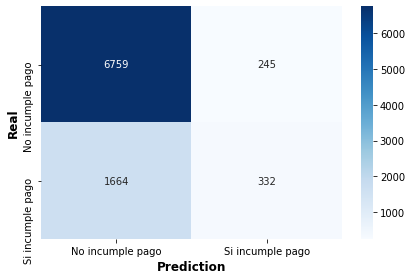

In [24]:
classes = ['No incumple pago','Si incumple pago']
plot_confusion_matrix(predict_test_1,y_test,dom='Test',classes=classes)

**Importancia de variables**

In [25]:
model_1.best_estimator_.intercept_

array([-0.2])

In [26]:
colnames= X.columns
coef=model_1.best_estimator_.coef_
coef=pd.DataFrame(coef).T
coef.rename(columns={0:'coef'},inplace=True)
for i in range(0,len(coef)):
    print(colnames[i], coef.iloc[i][0])

credito_otorgado($) -0.35854057278191176
marca_pago_mes_6 0.7251419474051307
marca_pago_mes_5 0.1164216106648227
marca_pago_mes_4 -0.12699191957098044
marca_pago_mes_3 0.04768129364272061
marca_pago_mes_2 0.1315640214164919
marca_pago_mes_1 0.03381115731175902
estado_cuenta_mes_6($) -0.2882076673574383
estado_cuenta_mes_5($) -0.12965901819233067
estado_cuenta_mes_4($) -0.03754228920187183
estado_cuenta_mes_3($) -0.05517516908887358
estado_cuenta_mes_2($) 0.018549891065498977
estado_cuenta_mes_1($) 0.07178762151164986
monto_pago_anterior_6($) -0.3344175796188278
monto_pago_anterior_5($) -0.18259081317709655
monto_pago_anterior_4($) -0.18060902241052423
monto_pago_anterior_3($) -0.27371667354411533
monto_pago_anterior_2($) -0.34539917102257234
monto_pago_anterior_1($) -0.2974234246223246
genero_femenino 0.00893139104992098
genero_masculino -0.008718298182400405
educacion_bachillerato 0.0853580385640906
educacion_otros -0.07899433928284798
educacion_posgrado 0.10393208092666979
educacion_

### Backpropagation 

In [27]:
backprop=MLPClassifier(solver='sgd', tol=0.001, max_iter=300 ,random_state=142)

In [28]:
params = {'hidden_layer_sizes':[(20,),(20,20),(20,20,20)],
          'activation':['logistic', 'tanh', 'relu'],
          'alpha':[0.0001,0.0005,0.001,0.005]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=808)

In [29]:
model_2 = GridSearchCV(estimator=backprop,param_grid=params,n_jobs=-1, cv=cv, scoring='f1')

start_time = timeit.default_timer()
model_2.fit(X_trainbal,y_trainbal)
elapsed_2 = timeit.default_timer() - start_time

In [30]:
print("La ejecución fue de: ",elapsed_2/60)

La ejecución fue de:  9.4761047


In [31]:
means = model_2.cv_results_['mean_test_score']
stds = model_2.cv_results_['std_test_score']
params = model_2.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("Promedio del score es %f, con std de: (%f), y parametros: %r" % (mean, stdev, param))

Promedio del score es 0.579554, con std de: (0.009027), y parametros: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20,)}
Promedio del score es 0.593889, con std de: (0.042426), y parametros: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20)}
Promedio del score es 0.465800, con std de: (0.299805), y parametros: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 20, 20)}
Promedio del score es 0.579546, con std de: (0.009031), y parametros: {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (20,)}
Promedio del score es 0.593905, con std de: (0.042434), y parametros: {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (20, 20)}
Promedio del score es 0.465800, con std de: (0.299805), y parametros: {'activation': 'logistic', 'alpha': 0.0005, 'hidden_layer_sizes': (20, 20, 20)}
Promedio del score es 0.579546, con std de: (0.009031), y parametros: {'activation': 'logistic', 'alpha': 0.001, 'hidden_l

In [32]:
model_2.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0005, hidden_layer_sizes=(20, 20, 20),
              max_iter=300, random_state=142, solver='sgd', tol=0.001)

#### Desempeño 

In [33]:
predict_train_2=model_2.predict(X_train)
predict_test_2=model_2.predict(X_test)

In [34]:
print("Train")
print(classification_report(y_train, predict_train_2))

Train
              precision    recall  f1-score   support

           0       0.87      0.72      0.79     16360
           1       0.39      0.63      0.48      4640

    accuracy                           0.70     21000
   macro avg       0.63      0.67      0.63     21000
weighted avg       0.76      0.70      0.72     21000



In [35]:
print("Test")
print(classification_report(y_test, predict_test_2))

Test
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      7004
           1       0.37      0.61      0.46      1996

    accuracy                           0.69      9000
   macro avg       0.62      0.66      0.62      9000
weighted avg       0.75      0.69      0.71      9000



Test Confusion matrix


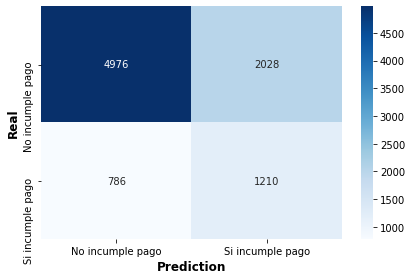

In [36]:
classes = ['No incumple pago','Si incumple pago']
plot_confusion_matrix(predict_test_2,y_test,dom='Test',classes=classes)

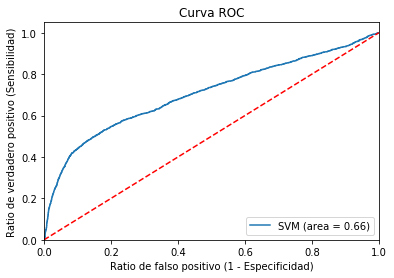

In [37]:
curva_roc = roc_auc_score(y_test, model_2.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_2.best_estimator_.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % curva_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio de falso positivo (1 - Especificidad)')
plt.ylabel('Ratio de verdadero positivo (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('Curva_roc')
plt.show()

#### Consolidado de resultados

In [38]:
from sklearn.metrics import confusion_matrix
labels = np.array([0, 1])

confusion_matrix_0 = confusion_matrix(y_test, predict_test_1, labels = labels)
confusion_matrix_1 = confusion_matrix(y_test, predict_test_2, labels = labels)
##
acc_0=(confusion_matrix_0[0][0]+confusion_matrix_0[1][1])/(confusion_matrix_0[0][0]+confusion_matrix_0[0][1]+confusion_matrix_0[1][0]+confusion_matrix_0[1][1])
acc=(confusion_matrix_1[0][0]+confusion_matrix_1[1][1])/(confusion_matrix_1[0][0]+confusion_matrix_1[0][1]+confusion_matrix_1[1][0]+confusion_matrix_1[1][1])
##
prec_0=(confusion_matrix_0[1][1])/(confusion_matrix_0[1][1]+confusion_matrix_0[0][1])
prec=(confusion_matrix_1[1][1])/(confusion_matrix_1[1][1]+confusion_matrix_1[0][1])
##
sens_0=(confusion_matrix_0[1][1])/(confusion_matrix_0[1][1]+confusion_matrix_0[1][0])
sens=(confusion_matrix_1[1][1])/(confusion_matrix_1[1][1]+confusion_matrix_1[1][0])
##
f1_score=2*(sens*prec)/(sens+prec)
f1_score_0=2*(sens_0*prec_0)/(sens_0+prec_0)
##
beta=2
f2_score=(1+beta**2)*((sens*prec)/(beta**2*prec+sens))
f2_score_0=(1+beta**2)*((sens_0*prec_0)/(beta**2*prec_0+sens_0))
##
curva_roc_0 = roc_auc_score(y_train, model_2.predict(X_train))

In [39]:
Tabla=pd.DataFrame({"Etapa":["Test","Test"],"Modelo":["Perceptron","ANN"],"Accuracy":[acc_0,acc],
                    "Precision":[prec_0,prec],"Sensibility":[sens_0,sens],
                    "F1 Score":[f1_score_0,f1_score],"F2 Score":[f2_score_0,f2_score],
                    "AUC":[curva_roc_0,curva_roc],"Gini":[2*curva_roc_0-1,2*curva_roc-1]})
Tabla

,Etapa,Modelo,Accuracy,Precision,Sensibility,F1 Score,F2 Score,AUC,Gini
0,Test,Perceptron,0.787889,0.575390,0.166333,0.258065,0.193903,0.671887,0.343775
1,Test,ANN,0.687333,0.373687,0.606212,0.462361,0.539120,0.658332,0.316664


### FIN 